# matplotlib动态图subplots()和subplot()不同及参数
一、fig，ax = subplots(nrows,ncols,sharex,sharey,squeeze,subplot_kw,gridspec_kw,**fig_kw)  创建画布和子图

1:nrows和ncols表示将画布分割成几行几列 例：nrows = 2,ncols = 2表示将画布分割为2行2列，并起始值都为0，当调用画布中的坐标轴时，ax[0,0]表示调用坐上角的，ax[1,1]表示调用右下角的；

2:sharex和sharey表示坐标轴的属性是否相同，可选的参数：True，False，row，col，默认值均为False，表示画布中的四个ax是相互独立的；

   a:当sharex = True, sharey = True时，生成的四个ax的所有坐标轴用有相同的属性;

4: squeeze  bool

　　a.默认参数为True：额外的维度从返回的Axes(轴)对象中挤出，对于N*1或1*N个子图，返回一个1维数组，对于N*M，N>1和M>1返回一个2维数组。

　　b.为False，不进行挤压操作：返回一个元素为Axes实例的2维数组，即使它最终是1x1。

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Some example data to display
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

# A figure with just one subplot
subplots() without arguments returns a Figure and a single Axes.

Text(0.5, 1.0, 'A single plot')

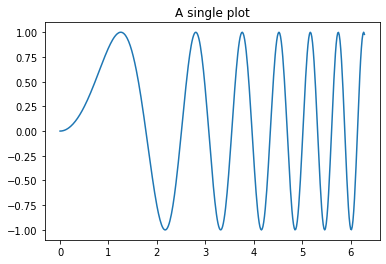

In [3]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('A single plot')

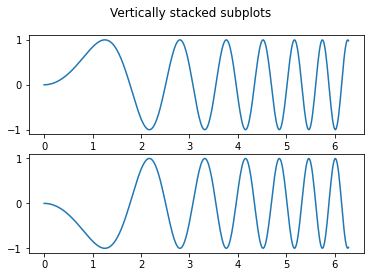

In [4]:
fig, axs = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
axs[0].plot(x, y)
axs[1].plot(x, -y)

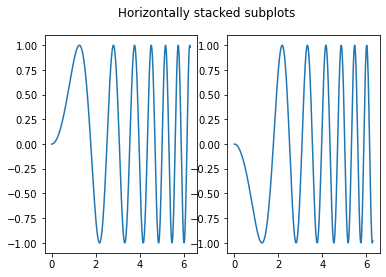

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2) #一行两列
fig.suptitle('Horizontally stacked subplots')
ax1.plot(x, y)
ax2.plot(x, -y)

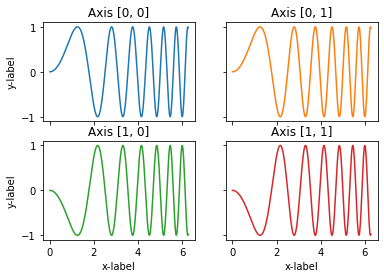

In [6]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x, y)
axs[0, 0].set_title('Axis [0, 0]') #第一行第一列

axs[0, 1].plot(x, y, 'tab:orange')
axs[0, 1].set_title('Axis [0, 1]') #第一行，第二列

axs[1, 0].plot(x, -y, 'tab:green')
axs[1, 0].set_title('Axis [1, 0]')

axs[1, 1].plot(x, -y, 'tab:red')
axs[1, 1].set_title('Axis [1, 1]')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

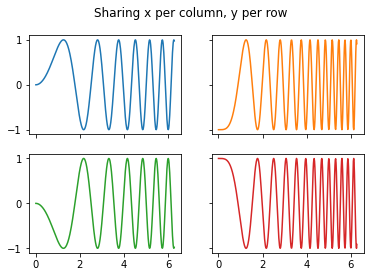

In [7]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Sharing x per column, y per row')
ax1.plot(x, y)
ax2.plot(x, y**2, 'tab:orange')
ax3.plot(x, -y, 'tab:green')
ax4.plot(x, -y**2, 'tab:red')

for ax in fig.get_axes():
    ax.label_outer()

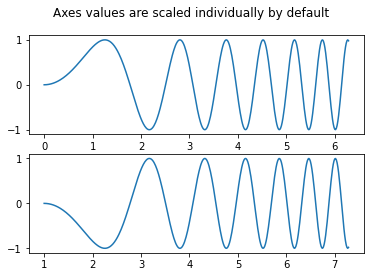

In [8]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Axes values are scaled individually by default')
ax1.plot(x, y)
ax2.plot(x + 1, -y)

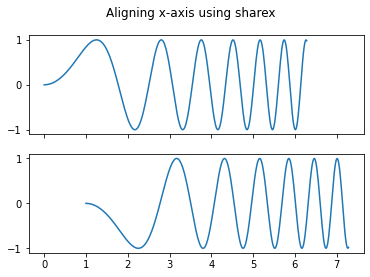

In [9]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('Aligning x-axis using sharex')
ax1.plot(x, y)
ax2.plot(x + 1, -y)

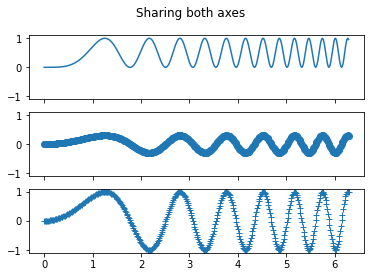

In [10]:
fig, axs = plt.subplots(3, sharex=True, sharey=True)
fig.suptitle('Sharing both axes')
axs[0].plot(x, y ** 2)
axs[1].plot(x, 0.3 * y, 'o')
axs[2].plot(x, y, '+')

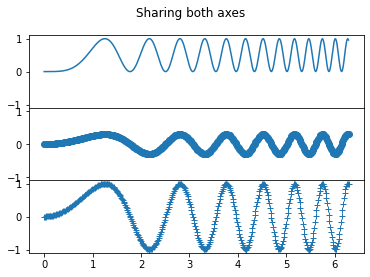

In [11]:
fig = plt.figure()
gs = fig.add_gridspec(3, hspace=0)
axs = gs.subplots(sharex=True, sharey=True)
fig.suptitle('Sharing both axes')
axs[0].plot(x, y ** 2)
axs[1].plot(x, 0.3 * y, 'o')
axs[2].plot(x, y, '+')

# Hide x labels and tick labels for all but bottom plot.
for ax in axs:
    ax.label_outer()

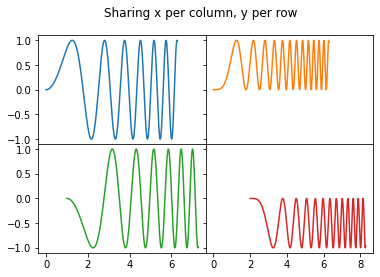

In [12]:
fig = plt.figure()
gs = fig.add_gridspec(2, 2, hspace=0, wspace=0)
(ax1, ax2), (ax3, ax4) = gs.subplots(sharex='col', sharey='row')
fig.suptitle('Sharing x per column, y per row')
ax1.plot(x, y)
ax2.plot(x, y**2, 'tab:orange')
ax3.plot(x + 1, -y, 'tab:green')
ax4.plot(x + 2, -y**2, 'tab:red')

for ax in axs.flat:
    ax.label_outer()

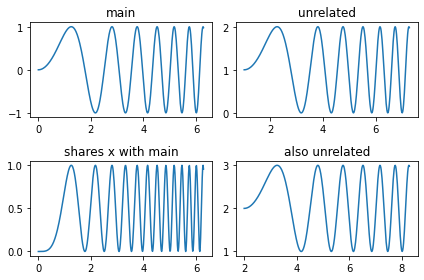

In [13]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x, y)
axs[0, 0].set_title("main")

axs[1, 0].plot(x, y**2)
axs[1, 0].set_title("shares x with main")
axs[1, 0].sharex(axs[0, 0])

axs[0, 1].plot(x + 1, y + 1)
axs[0, 1].set_title("unrelated")

axs[1, 1].plot(x + 2, y + 2)
axs[1, 1].set_title("also unrelated")
fig.tight_layout()

# Example #1: A 2x2 Subplot Grid

Text(0.5, 1.0, 'A Histogram of Petal Widths from the Iris Data Set')

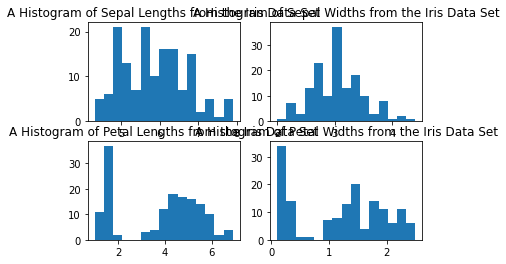

In [18]:
#First, let's import the Iris data set:
import pandas as pd 
iris_data = pd.read_json('https://raw.githubusercontent.com/nicholasmccullum/python-visualization/master/iris/iris.json')

# let's create a 2x2 subplot with a subplot for each of the following variables (in the order they're listed):

plt.subplot(2,2,1)
plt.hist(iris_data['sepalLength'], bins = 15)
plt.title('A Histogram of Sepal Lengths from the Iris Data Set')


plt.subplot(2,2,2)
plt.hist(iris_data['sepalWidth'], bins = 15)
plt.title('A Histogram of Sepal Widths from the Iris Data Set')


plt.subplot(2,2,3)
plt.hist(iris_data['petalLength'], bins = 15)
plt.title('A Histogram of Petal Lengths from the Iris Data Set')


plt.subplot(2,2,4)
plt.hist(iris_data['petalWidth'], bins = 15)
plt.title('A Histogram of Petal Widths from the Iris Data Set')

# Example #2: A 2x3 Subplot Grid

In [19]:
wine_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

Text(0.5, 1.0, 'Citric Acid plotted against Fixed Acidity')

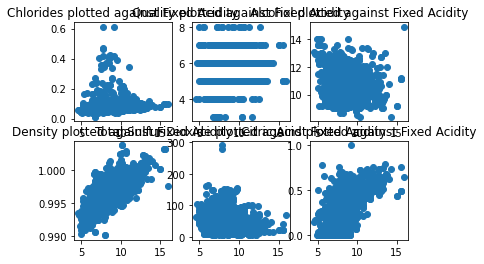

In [20]:
x = wine_data['fixed acidity']

plt.subplot(2,3,1)
plt.scatter(x, wine_data['chlorides'])
plt.title('Chlorides plotted against Fixed Acidity')

plt.subplot(2,3,2)
plt.scatter(x, wine_data['quality'])
plt.title('Quality plotted against Fixed Acidity')

plt.subplot(2,3,3)
plt.scatter(x, wine_data['alcohol'])
plt.title('Alcohol plotted against Fixed Acidity')

plt.subplot(2,3,4)
plt.scatter(x, wine_data['density'])
plt.title('Density plotted against Fixed Acidity')

plt.subplot(2,3,5)
plt.scatter(x, wine_data['total sulfur dioxide'])
plt.title('Total Sulfur Dioxide plotted against Fixed Acidity')

plt.subplot(2,3,6)
plt.scatter(x, wine_data['citric acid'])
plt.title('Citric Acid plotted against Fixed Acidity')

# plt.subplot('行','列','编号')

Text(0.5, 1.0, 'Microsoft (MSFT) Stock Price')

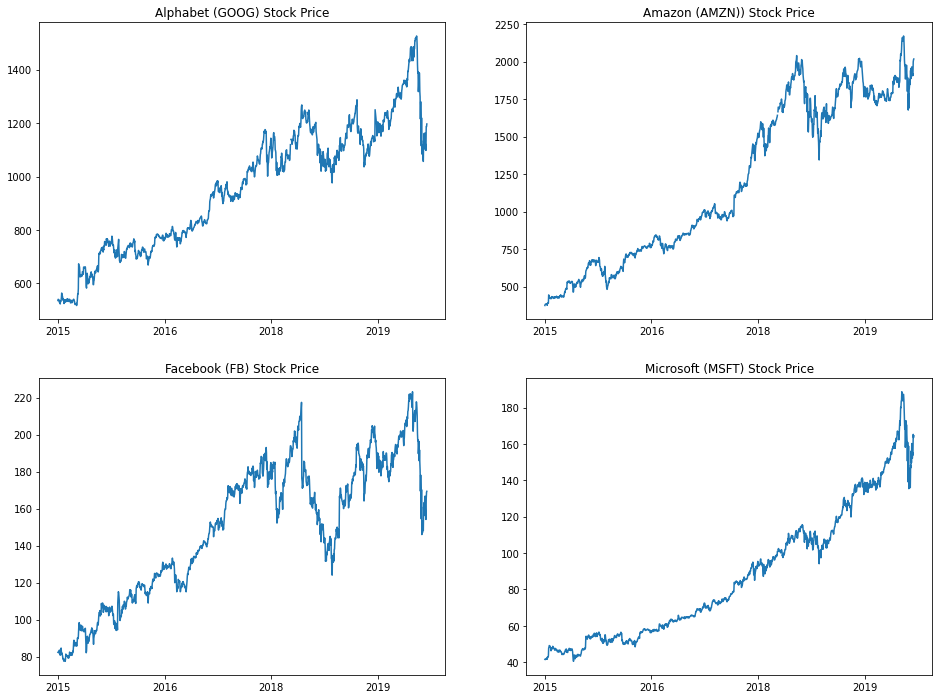

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

tech_stocks_data = pd.read_csv('https://raw.githubusercontent.com/nicholasmccullum/python-visualization/master/tech_stocks/GOOG_MSFT_FB_AMZN_data.csv')
tech_stocks_data.sort_values('Period', ascending = True, inplace = True)

google = tech_stocks_data['Alphabet Inc Price']
amazon = tech_stocks_data['Amazon.com Inc Price']
facebook = tech_stocks_data['Facebook Inc Price']
microsoft = tech_stocks_data['Microsoft Corp Price']

dates = tech_stocks_data['Period']
x = []
for date in tech_stocks_data['Period']:

    x.append(datetime.strptime(date, '%Y-%m-%d %H:%M:%S').year)

    
plt.figure(figsize=(16,12))

#Plot 1
plt.subplot(2,2,1) #两行两列,这是第1个图
plt.xticks(np.arange(0, len(x) + 1)[::365], x[::365])
plt.plot(dates, google)
plt.title('Alphabet (GOOG) Stock Price')

#Plot 2
plt.subplot(2,2,2) #两行两列,这是第二个图
plt.xticks(np.arange(0, len(x) + 1)[::365], x[::365])
plt.plot(dates, amazon)
plt.title('Amazon (AMZN)) Stock Price')

#Plot 3
plt.subplot(2,2,3) #两行两列,这是第3个图
plt.xticks(np.arange(0, len(x) + 1)[::365], x[::365])
plt.plot(dates, facebook)
plt.title('Facebook (FB) Stock Price')

#Plot 4
plt.subplot(2,2,4) #两行两列,这是第4个图
plt.xticks(np.arange(0, len(x) + 1)[::365], x[::365])
plt.plot(dates, microsoft)
plt.title('Microsoft (MSFT) Stock Price')